In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
os.chdir("D:\Stackerbee\AgriCrops\Cleaned Data - Copy")
# os.chdir("D:\Stackerbee\AgriCrops")
data = pd.read_csv('Green Gram Dal (Moong Dal)_cleaned_cleaned.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State Name                 1092 non-null   object 
 1   District Name              1092 non-null   object 
 2   Market Name                1092 non-null   object 
 3   Variety                    1092 non-null   object 
 4   Group                      1092 non-null   object 
 5   Arrivals (Tonnes)          1091 non-null   float64
 6   Min Price (Rs./Quintal)    1092 non-null   int64  
 7   Max Price (Rs./Quintal)    1092 non-null   int64  
 8   Modal Price (Rs./Quintal)  1092 non-null   int64  
 9   Reported Date              1092 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 85.4+ KB


In [4]:
data.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16


In [5]:
print(data.shape)

(1092, 10)


## Data Analysis

1. Finding the missing values
2. All the numerical variables.
3. Distribution of the numerical variables.
4. Categorical variables.
5. Credibility of Categorical variables.
6. Outliers.
7. Relationship between the dependent and independent varables.¶

### Missing values

In [6]:
columns_with_missing_values = [feature for feature in data.columns if data[feature].isnull().sum() > 1] 
columns_with_missing_values

[]

### All the numerical Variables

In [7]:
columns_with_numerical_values = [feature for feature in data if data[feature].dtypes != 'O'] 
columns_with_numerical_values

['Arrivals (Tonnes)',
 'Min Price (Rs./Quintal)',
 'Max Price (Rs./Quintal)',
 'Modal Price (Rs./Quintal)']

In [8]:
data[columns_with_numerical_values].head()

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,5.6,5000,5050,5040
1,5.4,4350,4400,4380
2,6.5,4500,6950,4550
3,9.2,4500,4630,4600
4,150.0,3900,4100,4000


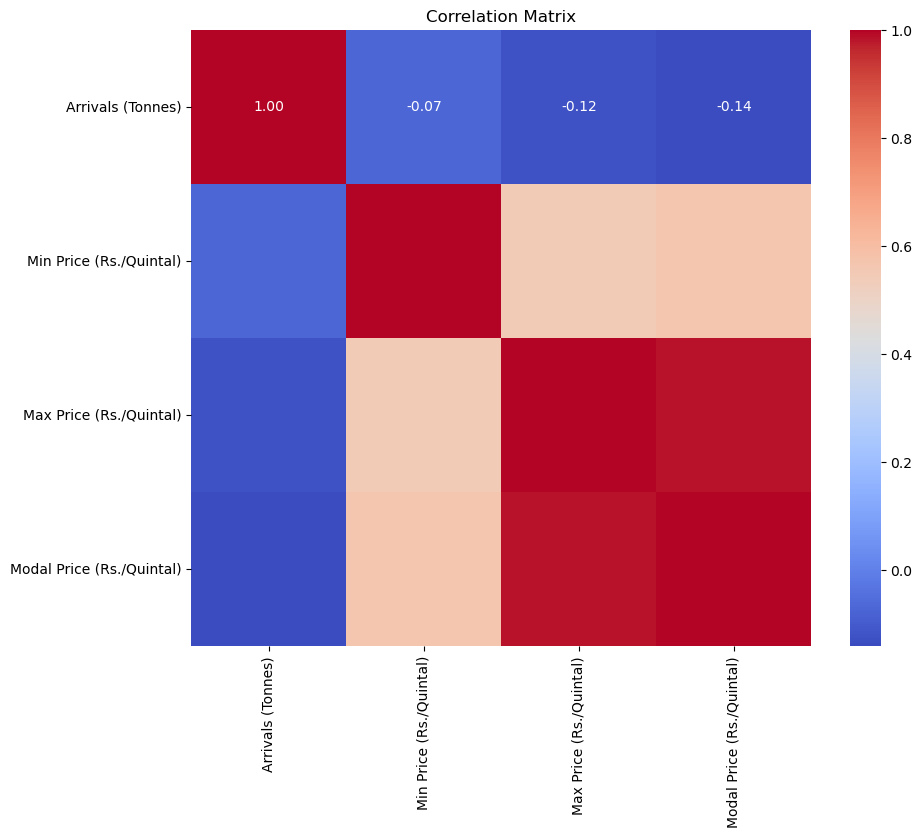

In [9]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[columns_with_numerical_values].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
data['Reported Date'] = pd.to_datetime(data['Reported Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 1092 non-null   object        
 1   District Name              1092 non-null   object        
 2   Market Name                1092 non-null   object        
 3   Variety                    1092 non-null   object        
 4   Group                      1092 non-null   object        
 5   Arrivals (Tonnes)          1091 non-null   float64       
 6   Min Price (Rs./Quintal)    1092 non-null   int64         
 7   Max Price (Rs./Quintal)    1092 non-null   int64         
 8   Modal Price (Rs./Quintal)  1092 non-null   int64         
 9   Reported Date              1092 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 85.4+ KB


In [11]:
dataframe = data.copy()
# Extracting day, month, and year
dataframe['Day'] = dataframe['Reported Date'].dt.day
dataframe['Month'] = dataframe['Reported Date'].dt.month
dataframe['Year'] = dataframe['Reported Date'].dt.year

dataframe.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08,8,12,2022
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22,22,7,2022
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06,6,2,2019
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05,5,2,2019
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16,16,9,2022


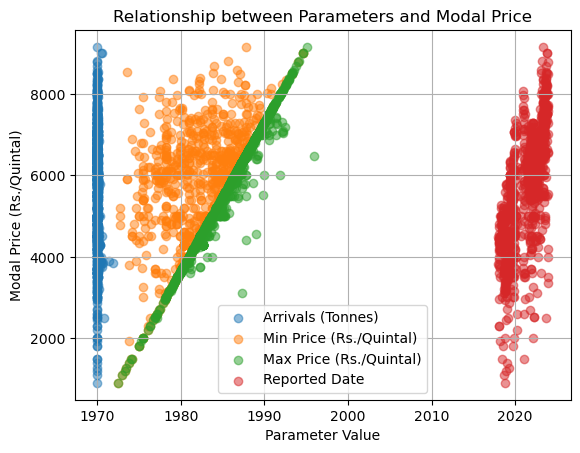

In [12]:
for column in ['Arrivals (Tonnes)', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)','Reported Date']:
    plt.scatter(dataframe[column], dataframe['Modal Price (Rs./Quintal)'],
                alpha=0.5, label=column)

plt.xlabel('Parameter Value')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Relationship between Parameters and Modal Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
col = columns_with_numerical_values + ['Reported Date','Day','Month','Year']
monthly_mean_data = dataframe[col].groupby('Month').mean()
monthly_mean_data[columns_with_numerical_values]

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Month,,,,
1,2.034831,4885.123596,5534.280899,5458.382022
2,2.195506,4740.314607,5559.404494,5515.898876
3,44.238209,4617.686567,5140.089552,5104.552239
4,21.174394,4735.939394,5488.424242,5334.272727
5,10.249388,4694.163265,6159.530612,5982.551020
6,7.382222,4716.470000,6110.620000,6013.820000
7,7.551754,4568.245614,5941.140351,5900.350877
8,3.413208,4628.122642,5912.103774,5847.009434
9,8.695977,4265.896552,5722.505747,5647.218391


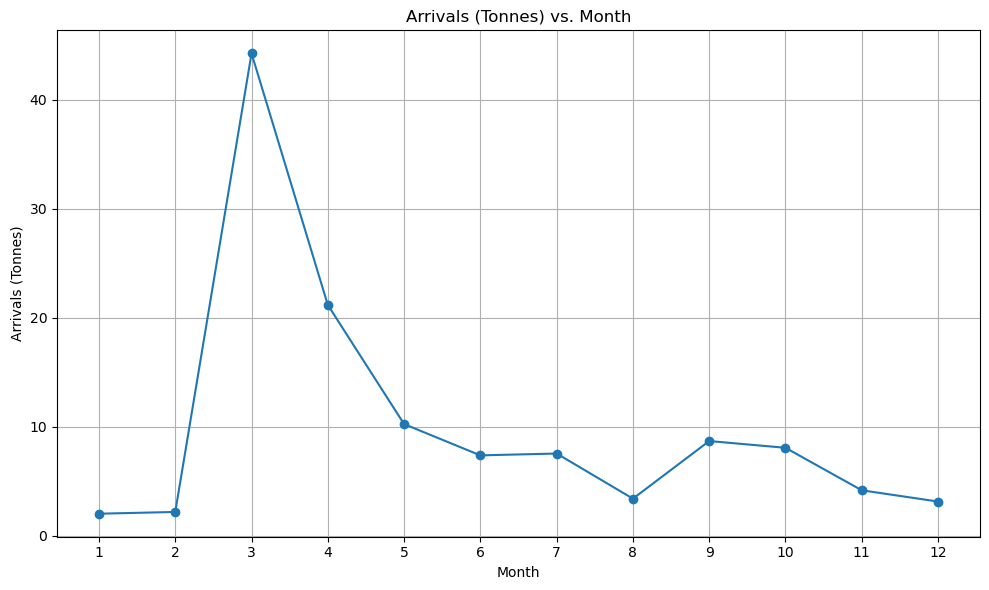

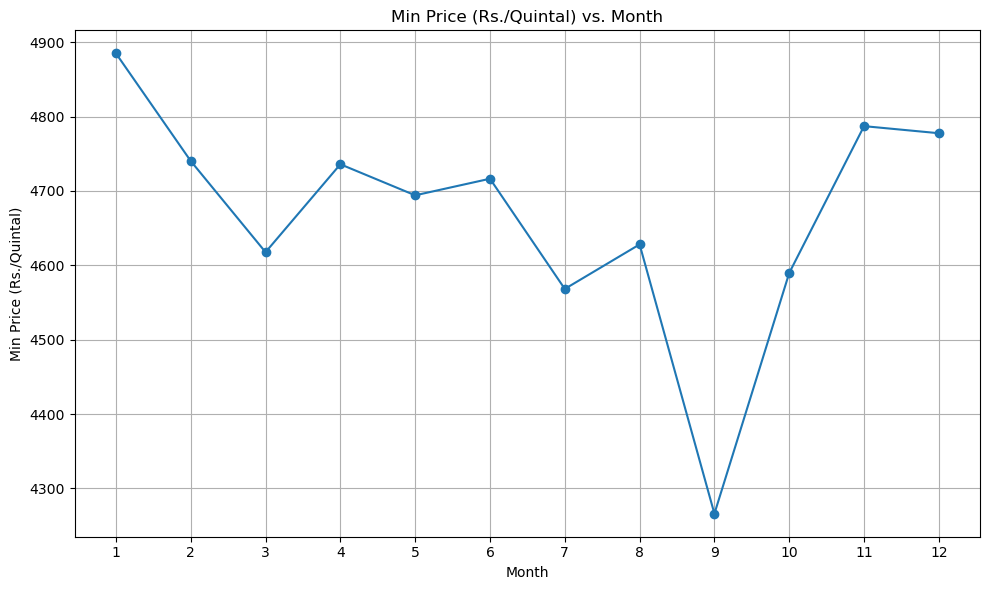

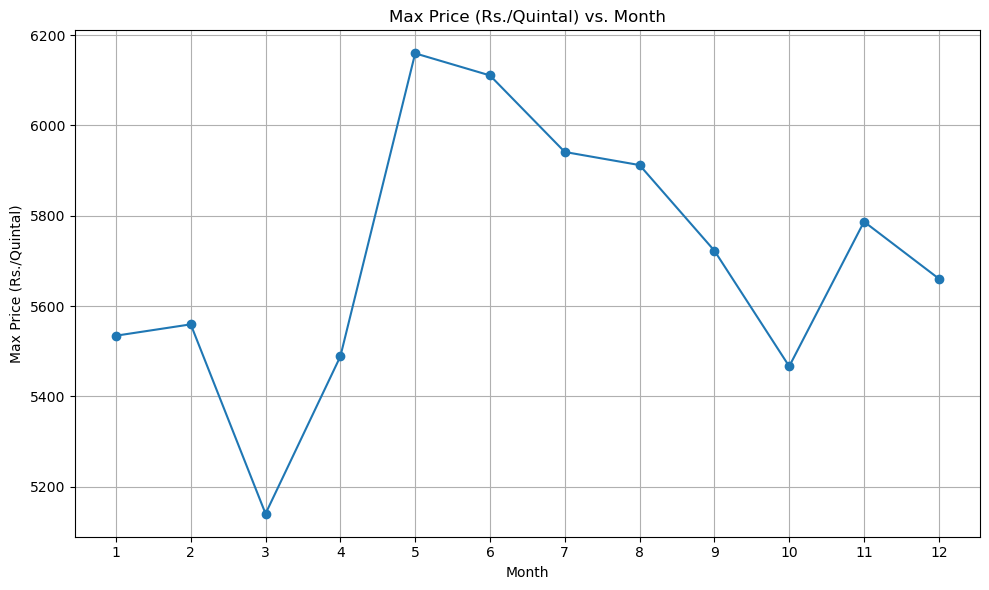

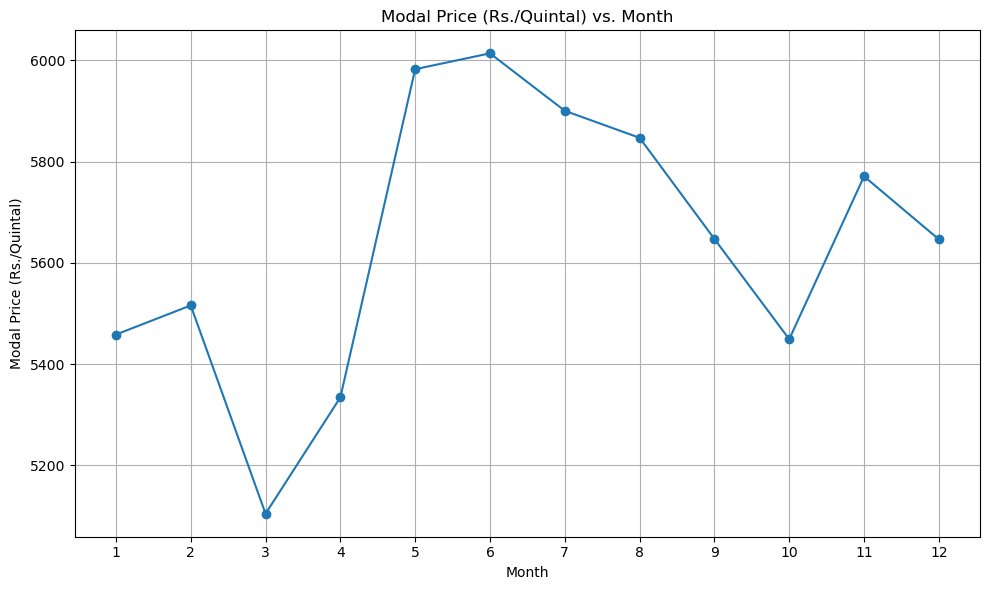

In [14]:
for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_mean_data.index, monthly_mean_data[column], marker='o', linestyle='-')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'{column} vs. Month')
    plt.grid(True)
    plt.xticks(monthly_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


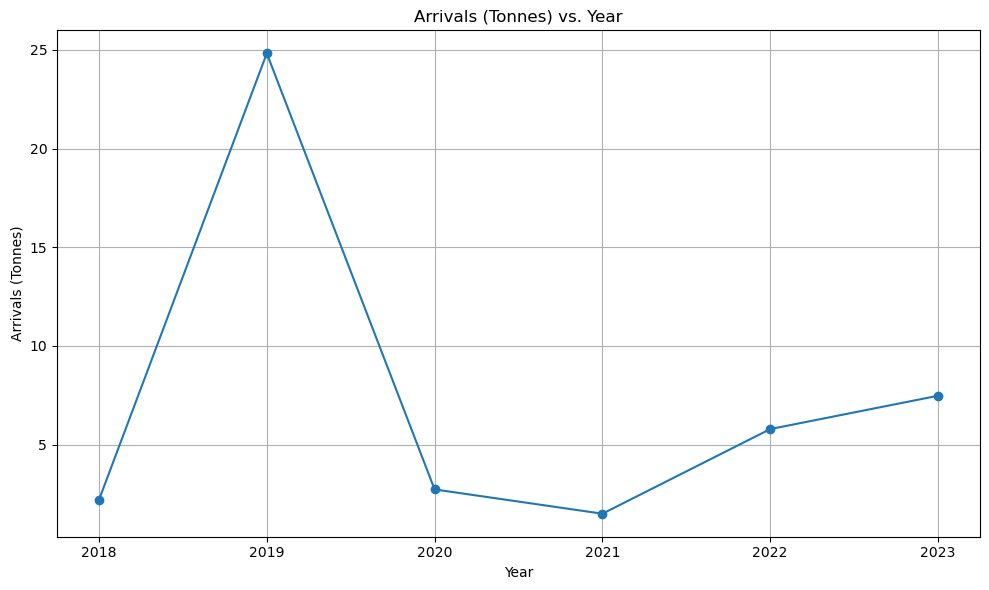

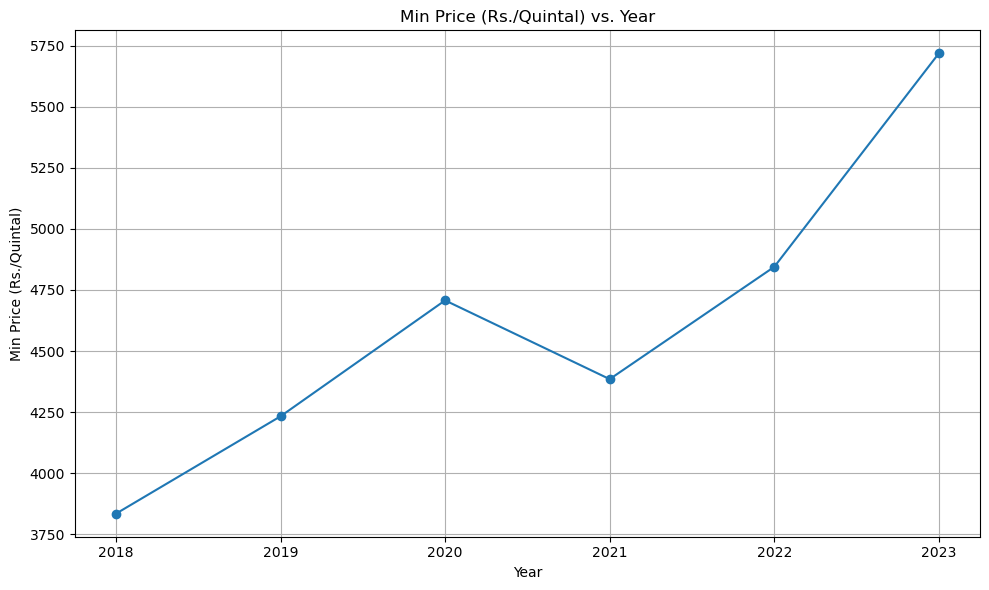

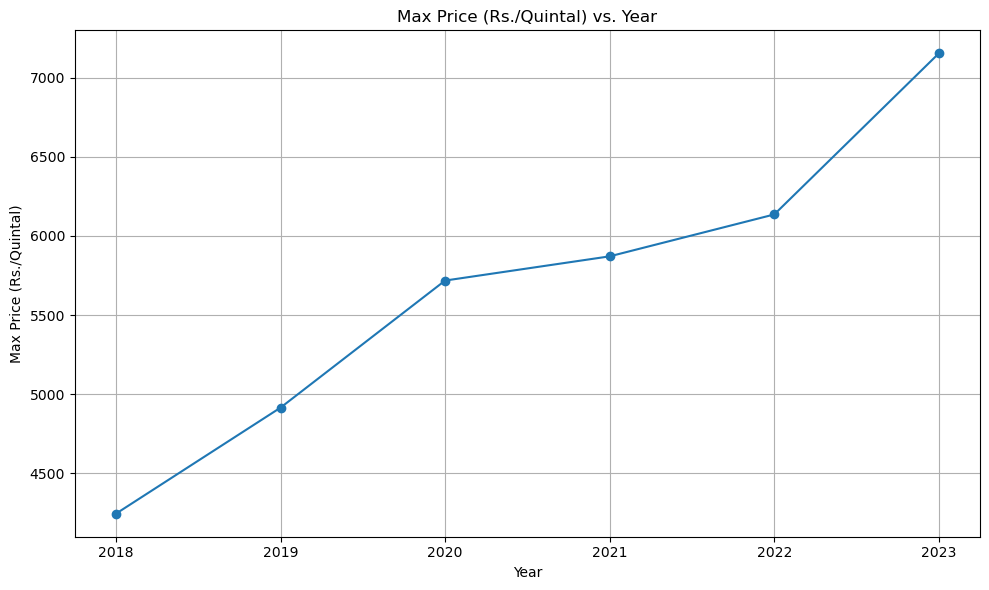

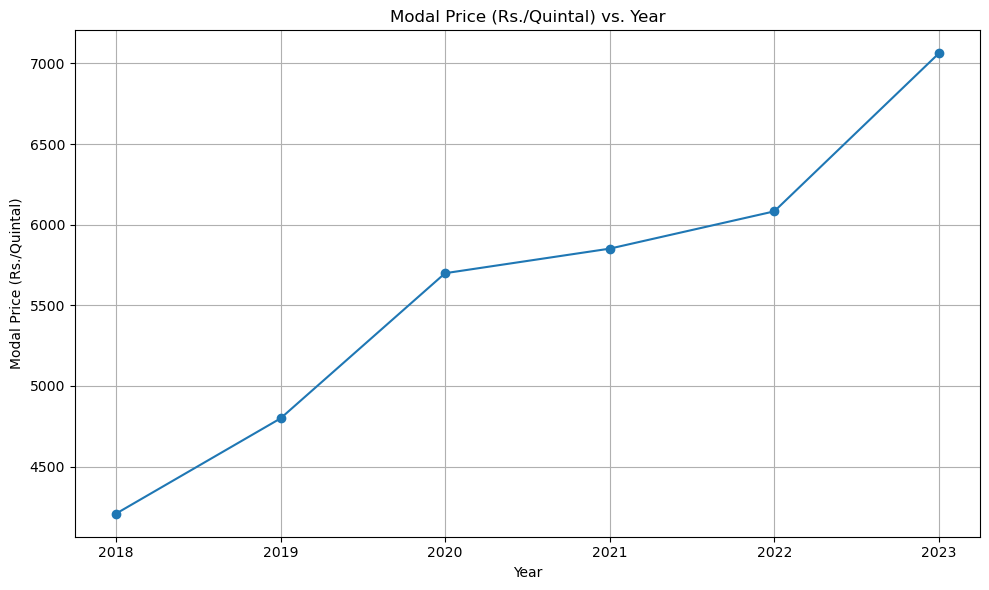

In [15]:
col = columns_with_numerical_values + ['Reported Date','Day','Month','Year']
Year_mean_data = dataframe[col].groupby('Year').mean()
Year_mean_data[columns_with_numerical_values]

for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(Year_mean_data.index, Year_mean_data[column], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{column} vs. Year')
    plt.grid(True)
    plt.xticks(Year_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [16]:
yearly_mean_data = dataframe[col].groupby('Year').mean()
yearly_mean_data[columns_with_numerical_values]

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Year,,,,
2018,2.198571,3834.630952,4244.982143,4207.291667
2019,24.825041,4233.095041,4915.004132,4798.342975
2020,2.728205,4707.461538,5717.974359,5699.000000
2021,1.498225,4385.235294,5871.000000,5851.294118
2022,5.786345,4844.735294,6135.710084,6082.621849
2023,7.475319,5718.289362,7153.485106,7062.638298


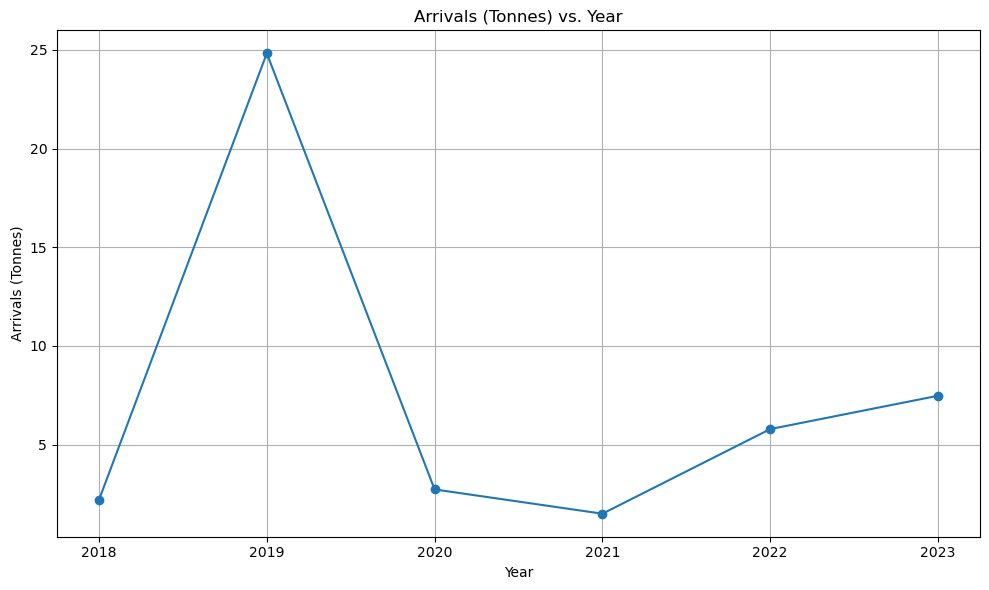

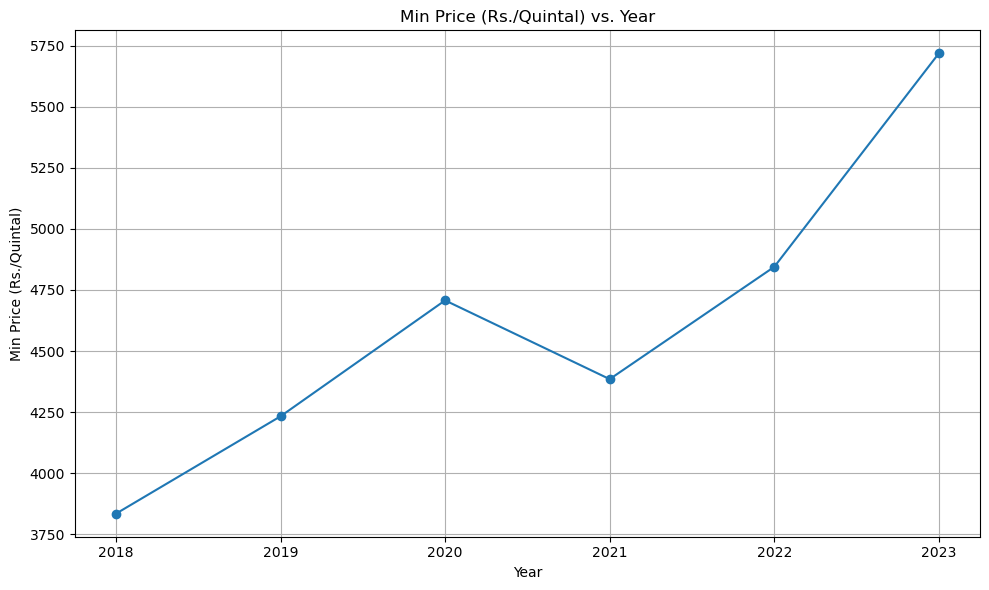

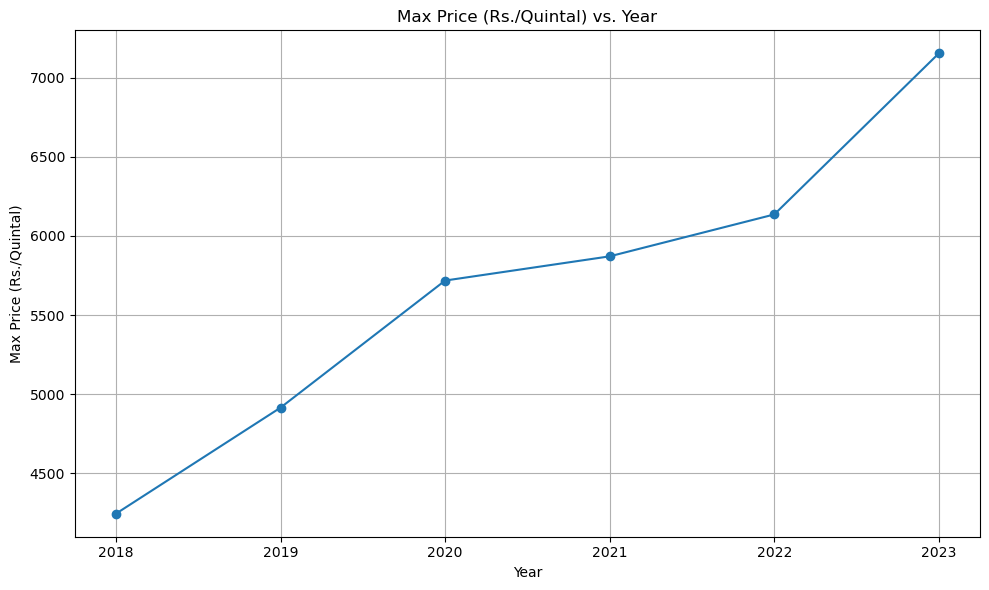

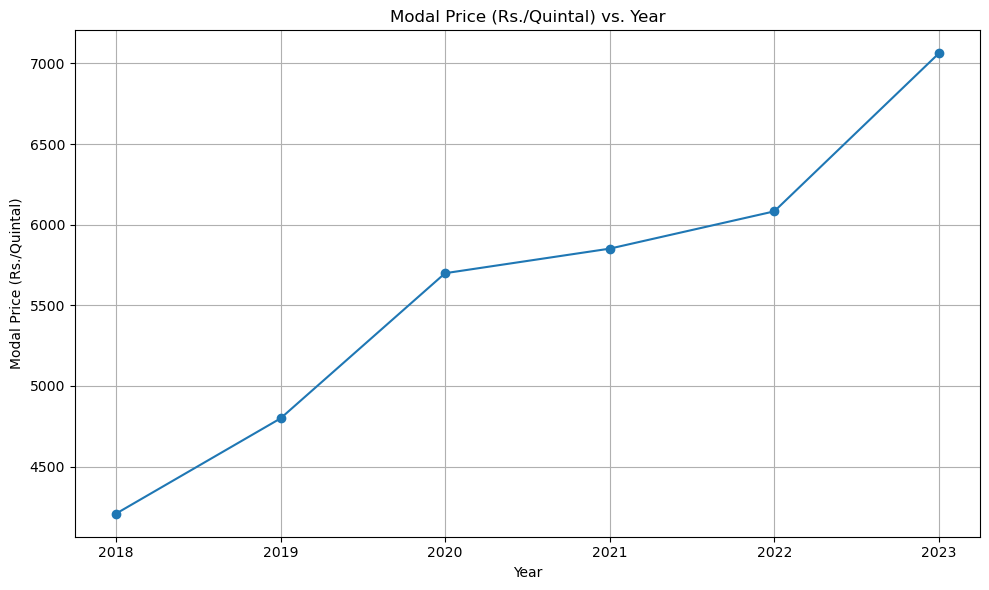

In [17]:
for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_mean_data.index, yearly_mean_data[column], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'{column} vs. Year')
    plt.grid(True)
    plt.xticks(yearly_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


### By the observation made usign the visulization it is clear the data shows a seasonality and a trend in time.

In [18]:
dataframe

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08,8,12,2022
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22,22,7,2022
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06,6,2,2019
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05,5,2,2019
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16,16,9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,0.1,5151,5151,5151,2018-07-18,18,7,2018
1088,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,0.6,4300,4300,4300,2018-06-14,14,6,2018
1089,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,0.1,1500,1500,1500,2018-05-30,30,5,2018
1090,Madhya Pradesh,Ujjain,Ujjain,Green Gram Dal,Pulses,1.0,4500,4500,4500,2018-05-28,28,5,2018


In [19]:
data_market = dataframe.groupby('Market Name')[columns_with_numerical_values].mean()
data_market.head()


,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Market Name,,,,
Ajaygarh,6.675,4587.5,5257.5,4642.5
Amarwda,150.000,3900.0,4100.0,4000.0
Badwani,7.000,6188.0,6580.0,6320.0
Ghansour,2.600,4400.0,4400.0,4400.0
Hanumana,13.900,4000.0,4500.0,4500.0


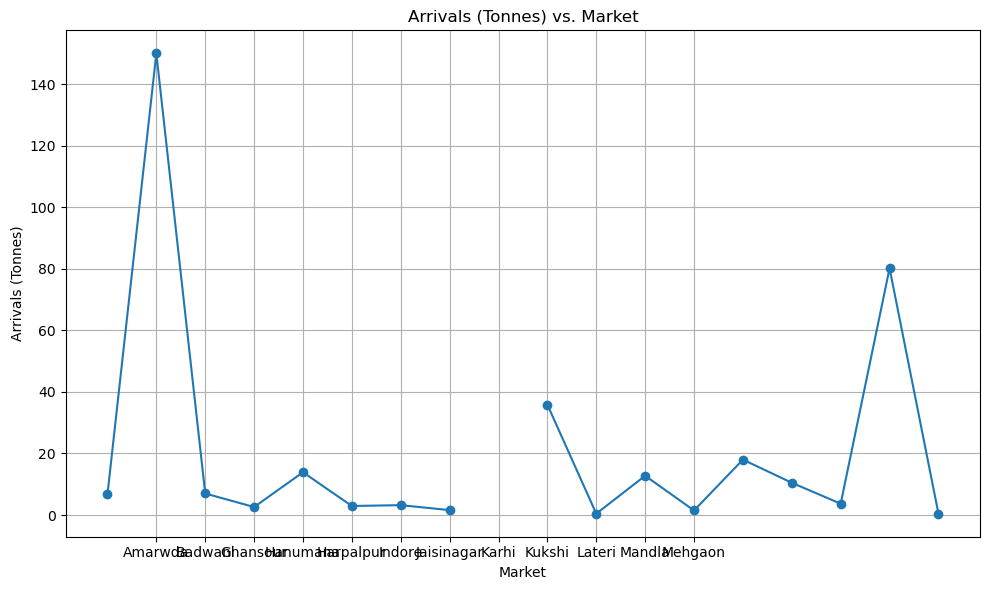

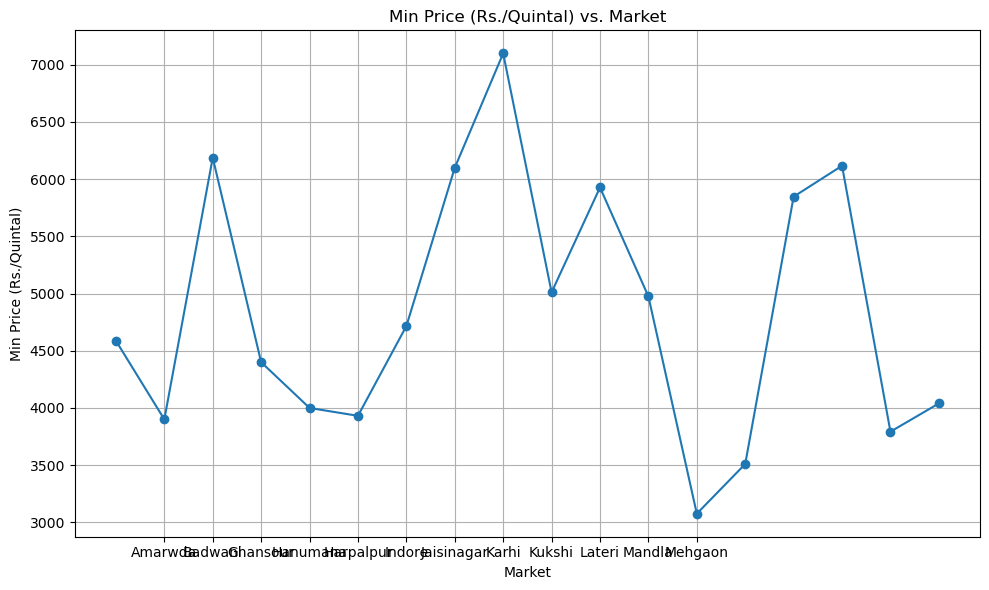

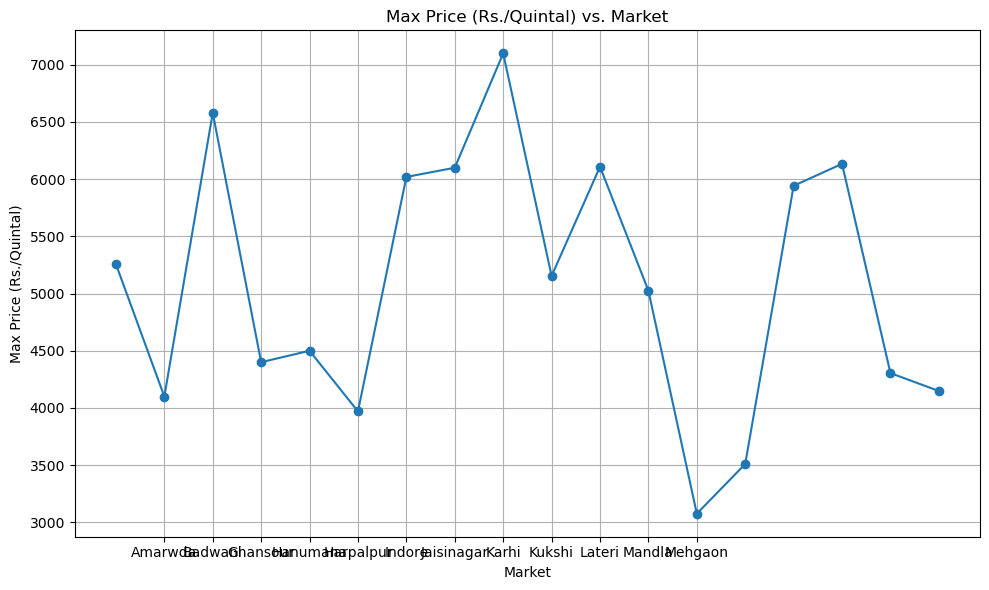

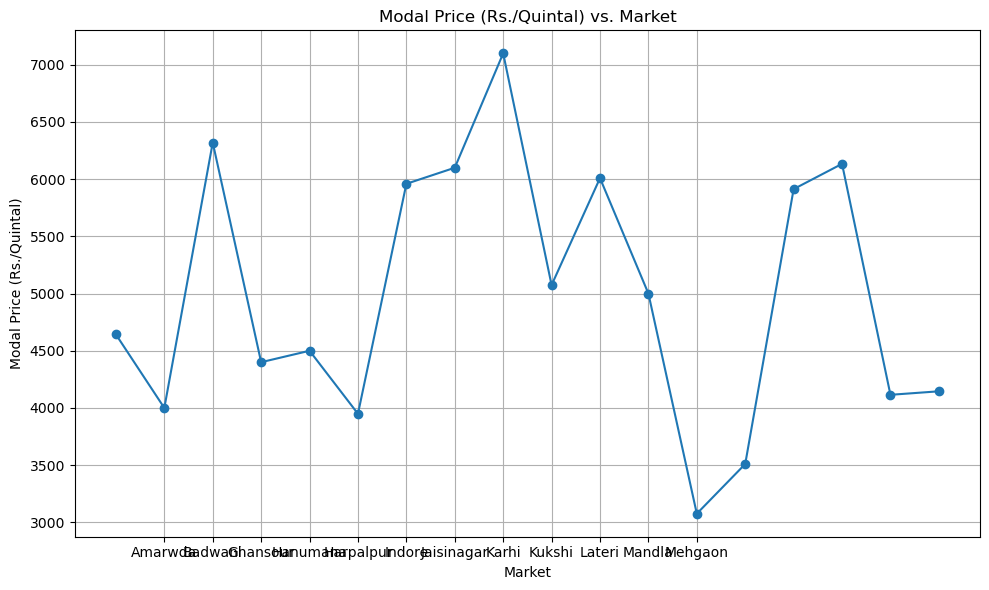

In [20]:
for column in columns_with_numerical_values:
    plt.figure(figsize=(10, 6))
    plt.plot(data_market.index, data_market[column], marker='o', linestyle='-')
    plt.xlabel('Market')
    plt.ylabel(column)
    plt.title(f'{column} vs. Market')
    plt.grid(True)
    plt.xticks(monthly_mean_data.index)  # Set x ticks to match the months
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [21]:
dataframe[col]

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,5.6,5000,5050,5040,2022-12-08,8,12,2022
1,5.4,4350,4400,4380,2022-07-22,22,7,2022
2,6.5,4500,6950,4550,2019-02-06,6,2,2019
3,9.2,4500,4630,4600,2019-02-05,5,2,2019
4,150.0,3900,4100,4000,2022-09-16,16,9,2022
...,...,...,...,...,...,...,...,...
1087,0.1,5151,5151,5151,2018-07-18,18,7,2018
1088,0.6,4300,4300,4300,2018-06-14,14,6,2018
1089,0.1,1500,1500,1500,2018-05-30,30,5,2018
1090,1.0,4500,4500,4500,2018-05-28,28,5,2018


In [22]:
dataframe['Month'] = pd.to_datetime(dataframe['Month'])
dataframe['Day'] = pd.to_datetime(dataframe['Day'])
dataframe['Year'] = pd.to_datetime(dataframe['Year'])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 1092 non-null   object        
 1   District Name              1092 non-null   object        
 2   Market Name                1092 non-null   object        
 3   Variety                    1092 non-null   object        
 4   Group                      1092 non-null   object        
 5   Arrivals (Tonnes)          1091 non-null   float64       
 6   Min Price (Rs./Quintal)    1092 non-null   int64         
 7   Max Price (Rs./Quintal)    1092 non-null   int64         
 8   Modal Price (Rs./Quintal)  1092 non-null   int64         
 9   Reported Date              1092 non-null   datetime64[ns]
 10  Day                        1092 non-null   datetime64[ns]
 11  Month                      1092 non-null   datetime64[ns]
 12  Year  

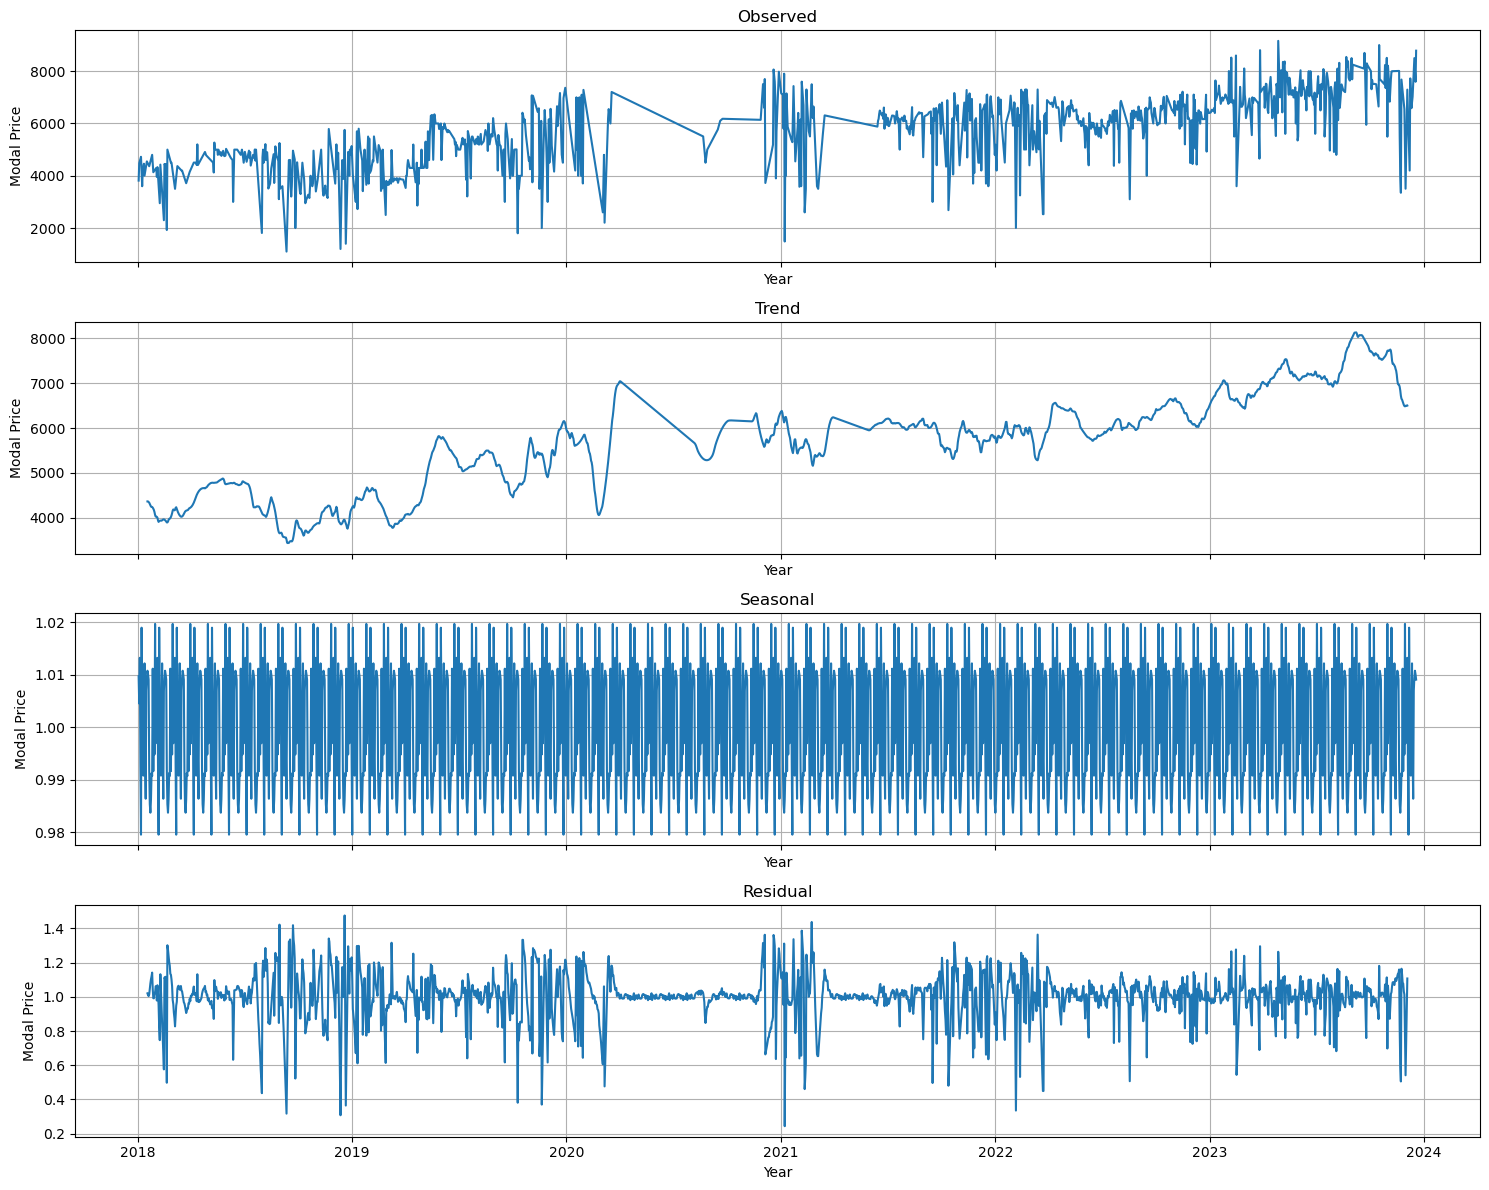

In [23]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'dataframe' is your DataFrame and 'col' is the column you're interested in
test = dataframe[col][['Modal Price (Rs./Quintal)', 'Reported Date']]

# Convert 'Reported Date' to datetime if it's not already
test['Reported Date'] = pd.to_datetime(test['Reported Date'])

# Remove duplicates
test = test.drop_duplicates(subset='Reported Date')

# Set 'Reported Date' as the index
test.set_index('Reported Date', inplace=True)

# Ensure the index has a frequency set
test = test.asfreq('D')  # Change 'D' to your data frequency, e.g., 'M' for monthly, 'W' for weekly, etc.

# Impute missing values
test['Modal Price (Rs./Quintal)'].interpolate(method='linear', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(test['Modal Price (Rs./Quintal)'], model='multiplicative', period=30)  # Adjust period as needed

# Plot the decomposition components with date labels
fig, axs = plt.subplots(4, figsize=(15, 12), sharex=True)

axs[0].plot(result.observed)
axs[0].set_title('Observed')
axs[1].plot(result.trend)
axs[1].set_title('Trend')
axs[2].plot(result.seasonal)
axs[2].set_title('Seasonal')
axs[3].plot(result.resid)
axs[3].set_title('Residual')

# Add grid and labels for better readability
for ax in axs:
    ax.grid(True)
    ax.set_xlabel('Year')
    ax.set_ylabel('Modal Price')

plt.tight_layout()
plt.show()


In [24]:
dataframe.head()

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
0,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.6,5000,5050,5040,2022-12-08,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002022
1,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,5.4,4350,4400,4380,2022-07-22,1970-01-01 00:00:00.000000022,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000002022
2,Madhya Pradesh,Panna,Ajaygarh,Green Gram Dal,Pulses,6.5,4500,6950,4550,2019-02-06,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000002019
3,Madhya Pradesh,Panna,Ajaygarh,Small (Split),Pulses,9.2,4500,4630,4600,2019-02-05,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000002019
4,Madhya Pradesh,Chhindwara,Amarwda,Green Gram Dal,Pulses,150.0,3900,4100,4000,2022-09-16,1970-01-01 00:00:00.000000016,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000002022


In [25]:
# Assuming 'dataframe' is your DataFrame containing the data

# Convert 'Reported Date' column to DateTime format if not already in DateTime format
dataframe['Reported Date'] = pd.to_datetime(dataframe['Reported Date'])

# Filter the DataFrame to include only the rows with the year 2021
dataframe_2021 = dataframe[dataframe['Reported Date'].dt.year == 2020]

# Now 'dataframe_2021' contains only the rows with the year 2021
dataframe_2021.head(100)

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Day,Month,Year
624,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,2.4,4205,7980,7980,2020-12-28,1970-01-01 00:00:00.000000028,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
625,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.4,4800,5700,5700,2020-12-24,1970-01-01 00:00:00.000000024,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
626,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.7,3900,3900,3900,2020-12-23,1970-01-01 00:00:00.000000023,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
627,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.7,5100,7155,7000,2020-12-22,1970-01-01 00:00:00.000000022,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
628,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.2,7600,7600,7600,2020-12-21,1970-01-01 00:00:00.000000021,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
629,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,2.8,4000,8065,8065,2020-12-19,1970-01-01 00:00:00.000000019,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
630,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.3,3295,5185,5185,2020-12-18,1970-01-01 00:00:00.000000018,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
631,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.1,3725,3725,3725,2020-12-05,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
632,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.2,7700,7700,7700,2020-12-04,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020
633,Madhya Pradesh,Indore,Indore,Green Gram Dal,Pulses,0.9,4305,6600,6600,2020-12-03,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000002020


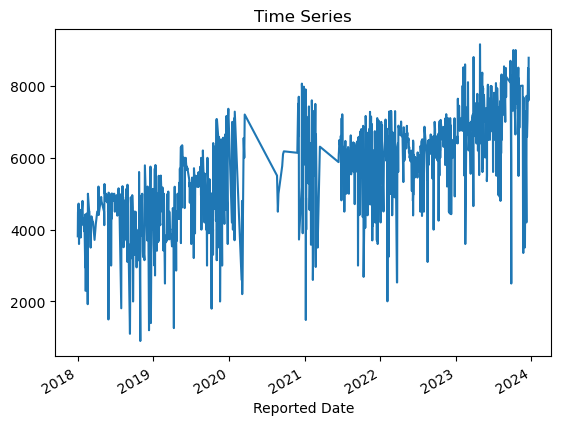

ADF Statistic: -2.947549284379673
p-value: 0.04009150712075247
Critical Values: {'1%': -3.436419361753321, '5%': -2.864219865461312, '10%': -2.5681968527091907}
KPSS Statistic: 3.1070581728462607
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\abhin\AppData\Local\Temp\ipykernel_12824\2086446588.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(ts)


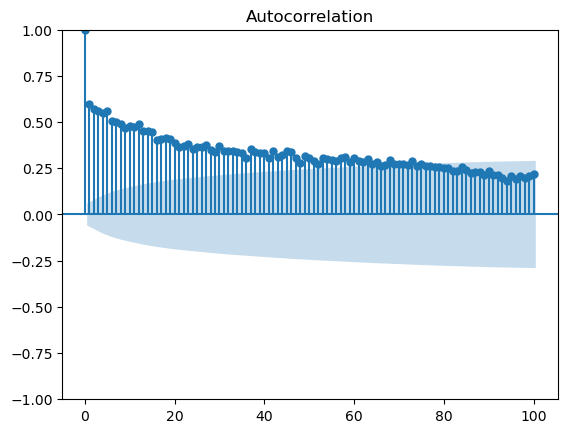

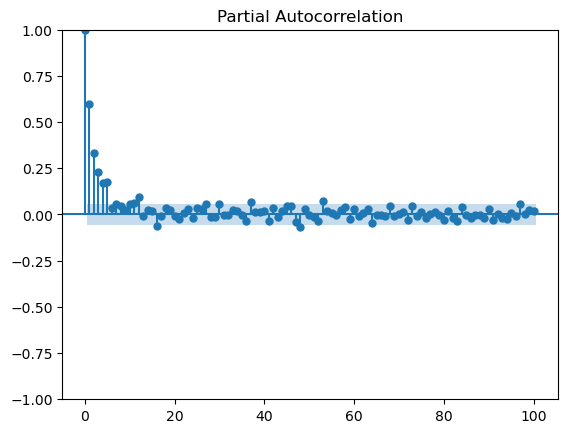

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load your time series data
# Example: data = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
ts = dataframe.copy()

ts.set_index('Reported Date', inplace=True)

ts = ts['Modal Price (Rs./Quintal)']

# Plotting the time series
ts.plot(title='Time Series')
plt.show()



# ADF Test
result_adf = adfuller(ts)
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

# KPSS Test
result_kpss = kpss(ts)
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Critical Values:', result_kpss[3])

# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts, lags=100)
plot_pacf(ts, lags=100)
plt.show()


In [27]:
ts.head()

Reported Date
2022-12-08    5040
2022-07-22    4380
2019-02-06    4550
2019-02-05    4600
2022-09-16    4000
Name: Modal Price (Rs./Quintal), dtype: int64

In [28]:
ts_diff = ts.diff()
ts_diff = ts_diff.dropna()

# Run test and print
result_diff = adfuller(ts_diff)
print(result_diff)

(-15.673172169452236, 1.5040021088864484e-28, 10, 1080, {'1%': -3.436419361753321, '5%': -2.864219865461312, '10%': -2.5681968527091907}, 17757.941969363914)


In [29]:
ts_diff = ts_diff.to_frame()
ts_diff.head()

,Modal Price (Rs./Quintal)
Reported Date,
2022-07-22,-660.0
2019-02-06,170.0
2019-02-05,50.0
2022-09-16,-600.0
2023-06-01,1500.0


In [30]:
columns_with_missing_values = [feature for feature in ts_diff.columns if ts_diff[feature].isnull().sum() > 1] 
columns_with_missing_values

[]

In [31]:
ts_diff.value_counts()

Modal Price (Rs./Quintal)
 0.0                         67
 200.0                       19
-75.0                        12
-100.0                       12
 300.0                       10
                             ..
-565.0                        1
-575.0                        1
-590.0                        1
-595.0                        1
 6420.0                       1
Name: count, Length: 552, dtype: int64

<Axes: xlabel='Reported Date'>

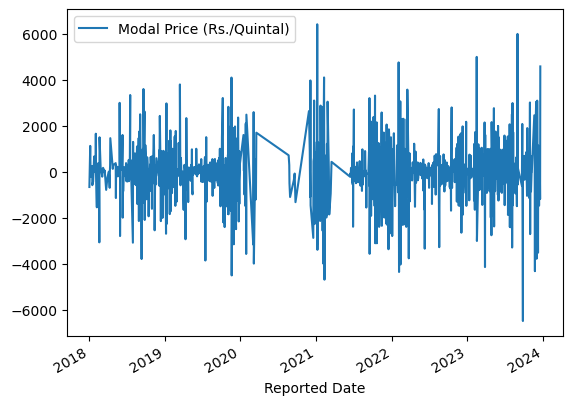

In [68]:
ts_diff.plot()

In [32]:
ts_diff.head()

,Modal Price (Rs./Quintal)
Reported Date,
2022-07-22,-660.0
2019-02-06,170.0
2019-02-05,50.0
2022-09-16,-600.0
2023-06-01,1500.0


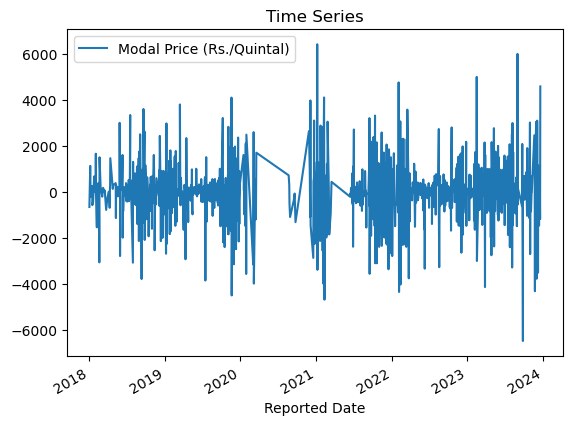

ADF Statistic: -15.673172169452236
p-value: 1.5040021088864484e-28
Critical Values: {'1%': -3.436419361753321, '5%': -2.864219865461312, '10%': -2.5681968527091907}
KPSS Statistic: 0.1610880805393739
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\abhin\AppData\Local\Temp\ipykernel_3368\1734644916.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(ts_diff)


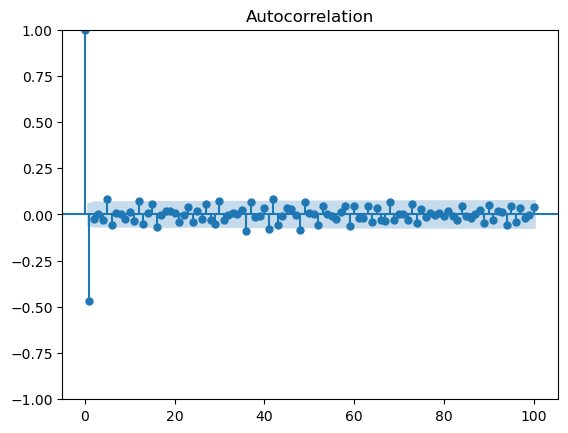

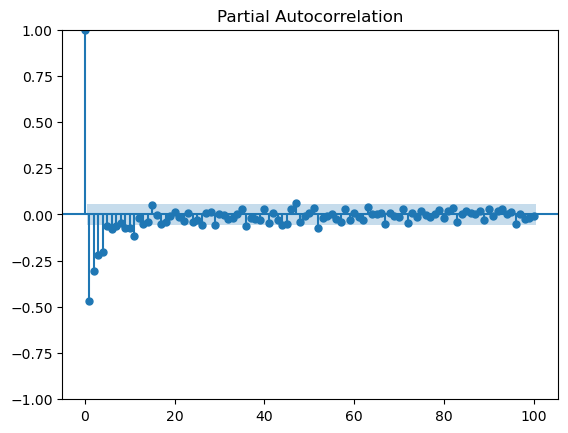

In [70]:

# Plotting the time series
ts_diff.plot(title='Time Series')
plt.show()


# ADF Test
result_adf = adfuller(ts_diff)
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

# KPSS Test
result_kpss = kpss(ts_diff)
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Critical Values:', result_kpss[3])

# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_diff, lags=100)
plot_pacf(ts_diff, lags=100)
plt.show()


In [71]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Reported Date'>

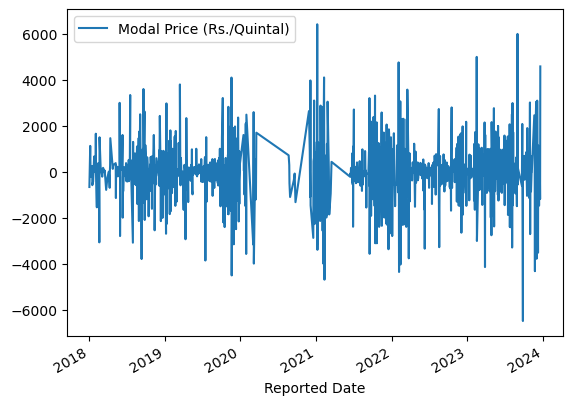

In [83]:
ts_diff = pd.DataFrame(ts_diff)
ts_diff.plot()

C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error (MSE): 1658071.4370350374


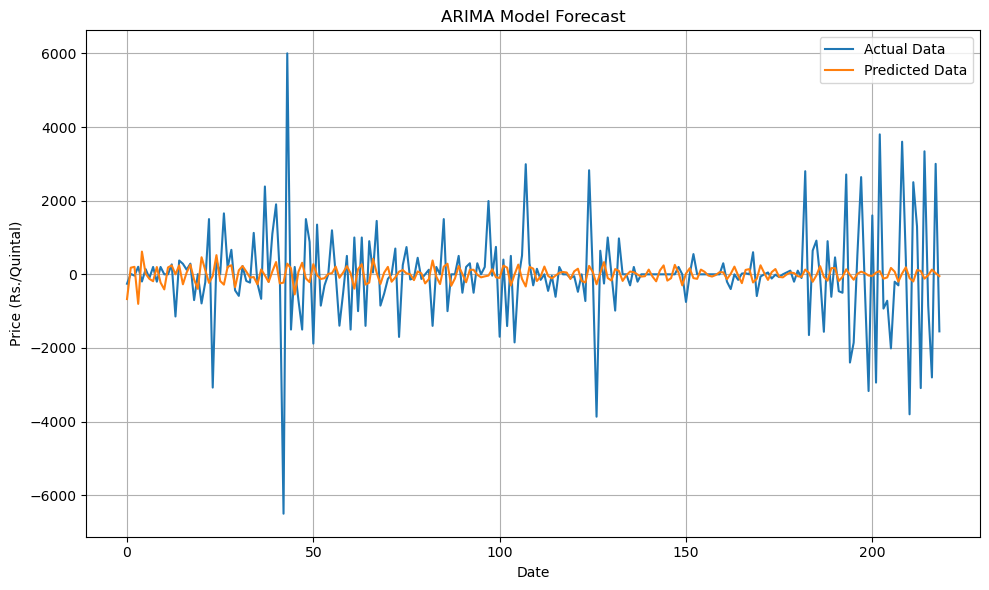

In [33]:
# Assuming 'ts_diff' has a DateTime index and 'Modal Price (Rs./Quintal)' is your time series data

# Split the data into training and testing sets
train_size = int(len(ts_diff) * 0.8)  # 80% of the data for training
train_data, test_data = ts_diff.iloc[:train_size], ts_diff.iloc[train_size:]

# Convert data to numpy arrays
train_data_np = np.asarray(train_data['Modal Price (Rs./Quintal)'])
test_data_np = np.asarray(test_data['Modal Price (Rs./Quintal)'])


# Train the ARIMA model
p = 30  # Autoregressive (AR) order
d = 0  # Integrated (I) order (since the data is already stationary)
q = 30 # Moving Average (MA) order

# Fit the ARIMA model
model = ARIMA(train_data_np, order=(p, d, q))
fitted_model = model.fit()

# Make predictions on the test data
n_forecast_steps = len(test_data)
forecast = fitted_model.forecast(steps=n_forecast_steps)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data_np, forecast)
print('Mean Squared Error (MSE):', mse)


# Create a DataFrame
df = pd.DataFrame({
    'Actual': test_data_np,
    'Predicted': forecast
})

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Actual'], label='Actual Data')
plt.plot(df.index, df['Predicted'], label='Predicted Data')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

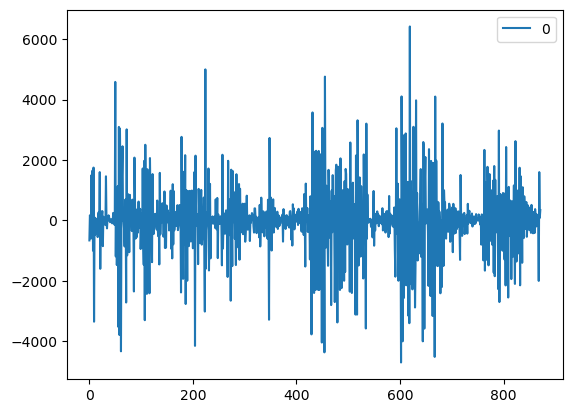

In [87]:
df = pd.DataFrame(train_data_np)
df.plot()